In [1]:
from insightface.app import FaceAnalysis

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
app = FaceAnalysis(name = "buffalo_S", providers=['CPUExecutionProvider'])
app.prepare(ctx_id = 0, det_size = (640, 640))

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/parisa/.insightface/models/buffalo_S/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/parisa/.insightface/models/buffalo_S/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/parisa/.insightface/models/buffalo_S/det_500m.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/parisa/.insightface/models/buffalo_S/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/parisa/.insightface/models/buffalo_S/w600k_mbf.onnx recognition ['None', 3, 112, 112] 127.5 127.5
s

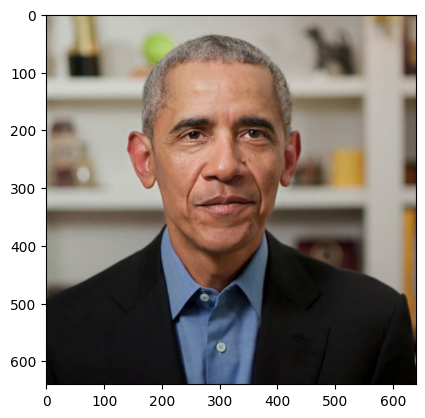

In [3]:
image_1 = cv2.imread("images/obama1.jpg")
image_1 = cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB)
plt.imshow(image_1)
plt.show()

In [4]:
result1 = app.get(image_1)

/home/parisa/.local/lib/python3.10/site-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


In [5]:
embedding_1 = result1[0]["embedding"]


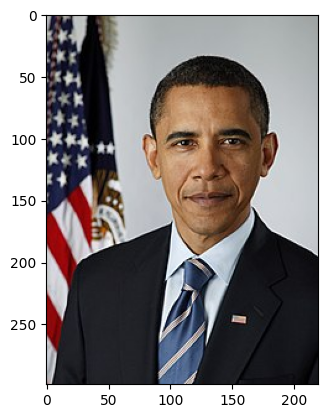

In [6]:
image_2 = cv2.imread("images/obama2.jpg")
image_2 = cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB)
plt.imshow(image_2)
plt.show()

In [7]:
result_2 = app.get(image_2)

In [8]:
embedding_2 = result_2[0]["embedding"]

In [9]:
dist = np.sqrt(np.sum((embedding_1 - embedding_2)**2))
dist

18.680983

### Compare Obama1 and Obama2

In [10]:
THRESHOLD = 25

if dist <= THRESHOLD :
    print("Same person :)")
else:
    print("Different persons")

Same person :)


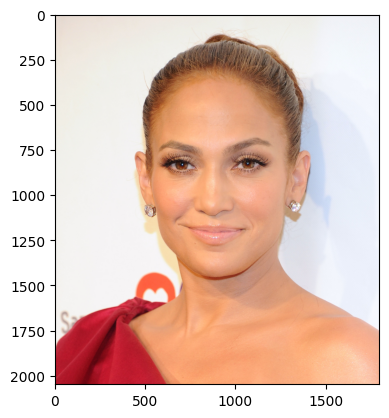

In [11]:
image_3 = cv2.imread("images/jlo1.jpg")
image_3 = cv2.cvtColor(image_3, cv2.COLOR_BGR2RGB)
plt.imshow(image_3)
plt.show()

In [12]:
result_3 = app.get(image_3)
embedding_3 = result_3[0]["embedding"]
dist = np.sqrt(np.sum((embedding_1 - embedding_3)**2))
dist

36.42612

### Compare Obama and JLO

In [13]:
THRESHOLD = 25

if dist <= THRESHOLD :
    print("Same person :)")
else:
    print("Different persons")

Different persons


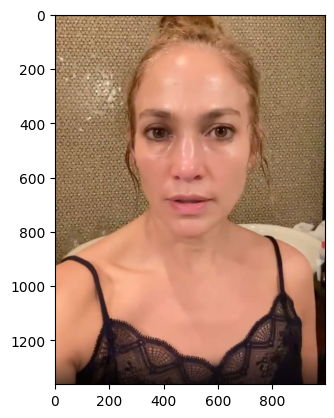

In [14]:
image_4 = cv2.imread("images/jlo2.jpg")
image_4 = cv2.cvtColor(image_4, cv2.COLOR_BGR2RGB)
plt.imshow(image_4)
plt.show()

In [15]:
result_4 = app.get(image_4)
embedding_4 = result_4[0]["embedding"]
dist = np.sqrt(np.sum((embedding_4 - embedding_3)**2))
dist

23.45394

### Compare JLO1 and JLO2

In [16]:
THRESHOLD = 25

if dist <= THRESHOLD :
    print("Same person :)")
else:
    print("Different persons")

Same person :)
